In [1]:
import numpy as np
import tensorflow as tf
from Dive_into_deep_learning.d2l import tensorflow as d2l

d2l.use_svg_display()

2023-08-18 12:47:47.978738: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-08-18 12:47:53.999260: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


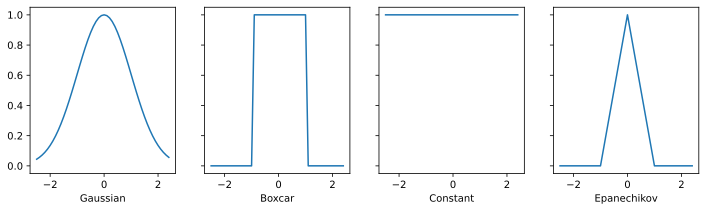

In [2]:
# define some kernels
def gaussian(x):
    return tf.exp(-x ** 2 / 2)

def boxcar(x):
    return tf.abs(x) < 1.0

def constant(x):
    return 1.0 + 0 * x

def epanechikov(x):
    return tf.maximum(0, 1 - tf.abs(x))


fig, axes = d2l.plt.subplots(1, 4, sharey=True, figsize=(12, 3))

kernels = (gaussian, boxcar, constant, epanechikov)
names = ('Gaussian', 'Boxcar', 'Constant', 'Epanechikov')
x = tf.range(-2.5, 2.5, 0.1)
for kernel, name, ax in zip(kernels, names, axes):
    ax.plot(x.numpy(), kernel(x).numpy())
    ax.set_xlabel(name)

In [3]:
# 准备数据
def f(x):
    return 2 * tf.sin(x) + x

n = 40
x_train = tf.sort(tf.random.uniform((n,1)) * 5, 0)
y_train = f(x_train) + tf.random.normal((n, 1)) # 加了噪音
x_val = tf.range(0, 5, 0.1)
y_val = f(x_val)

In [5]:
def nadaraya_watson(x_train, y_train, x_val, kernel):
    # (40, 1) - (1, 50)
    dists = tf.reshape(x_train, (-1, 1)) - tf.reshape(x_val, (1, -1))
    # k shape: (40, 50)
    k = tf.cast(kernel(dists), tf.float32)
    # (40, 50) / (50) = (40, 50)
    attention_w = k / tf.reduce_sum(k, 0)
    # (1, 40) @ (40, 50) = (1, 50)
    y_hat = tf.transpose(tf.transpose(y_train) @ attention_w)
    return y_hat, attention_w

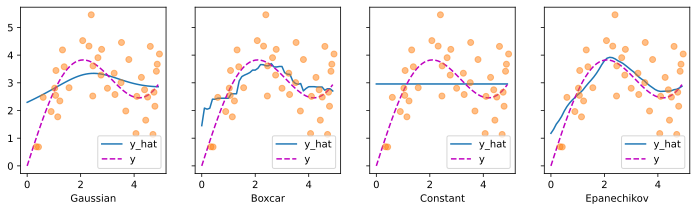

In [6]:
def plot(x_train, y_train, x_val, y_val, kernels, names, attention=False):
    fig, axes = d2l.plt.subplots(1, 4, sharey=True, figsize=(12, 3))
    for kernel, name, ax in zip(kernels, names, axes):
        y_hat, attention_w = nadaraya_watson(x_train, y_train, x_val, kernel)
        if attention:
            pcm = ax.imshow(attention_w.numpy(), cmap='Reds')
        else:
            ax.plot(x_val, y_hat)
            ax.plot(x_val, y_val, 'm--')
            ax.plot(x_train, y_train, 'o', alpha=0.5)
        ax.set_xlabel(name)
        if not attention:
            ax.legend(['y_hat', 'y'])
    if attention:
        fig.colorbar(pcm, ax=axes, shrink=0.7)

plot(x_train, y_train, x_val, y_val, kernels, names)

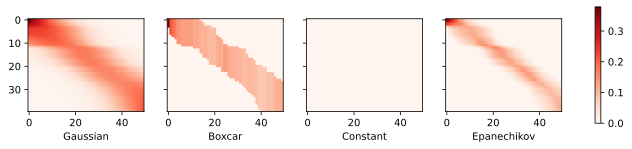

In [7]:
plot(x_train, y_train, x_val, y_val, kernels, names, attention=True)

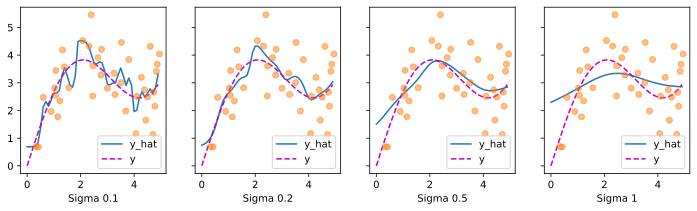

In [8]:
# 不同的sigma
sigmas = (0.1, 0.2, 0.5, 1)
names = ['Sigma ' + str(sigma) for sigma in sigmas]

def gaussian_with_width(sigma):
    return (lambda x: tf.exp(-x**2 / (2*sigma**2)))

kernels = [gaussian_with_width(sigma) for sigma in sigmas]
plot(x_train, y_train, x_val, y_val, kernels, names)

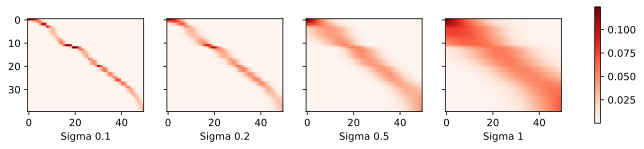

In [9]:
plot(x_train, y_train, x_val, y_val, kernels, names, attention=True)